# Roller Coaster Analysis

### Data in Motion: Data Analysis Challenge 8

## Scenario
You are a data analyst and you have been tasked with uncovering insights about roller coasters. The data is very messy and will require some cleaning. Your manager would like the following questions answered.

## Dataset Link
https://raw.githubusercontent.com/kedeisha1/Challenges/main/coaster_db.csv

## Questions
- How many columns and rows are in the dataset?
- Is there any missing data?
- Display the summary statistics of the numeric columns using the describe method.
- Rename the following columns:
    - coaster_name ➡️  Coaster_Name
    - year_introduced ➡️ Year_Introduced
    - opening_date_clean ➡️ Opening_Date
    - speed_mph ➡️ Speed_mph
    - height_ft ➡️ Height_ft
    - Inversions_clean ➡️ Inversions
    - Gforce_clean ➡️ Gforce
- Are there any duplicated rows?
- What are the top 3 years with the most roller coasters introduced?
- What is the average speed? Also display a plot to show it’s distribution.
- Explore the feature relationships. Are there any positively or negatively correlated relationships?
- Create your own question and answer it.

### Import libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
url = 'https://raw.githubusercontent.com/kedeisha1/Challenges/main/coaster_db.csv'
data = pd.read_csv(url)

### Exploring the data

In [3]:
data.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

In [5]:
# How many columns and rows are in the dataset?
data.shape

(1087, 56)

In [6]:
# Is there any missing data?
data.isna().sum()

coaster_name                        0
Length                            134
Speed                             150
Location                            0
Status                            213
Opening date                      250
Type                                0
Manufacturer                       59
Height restriction                256
Model                             343
Height                            122
Inversions                        155
Lift/launch system                292
Cost                              705
Trains                            369
Park section                      600
Duration                          322
Capacity                          512
G-force                           725
Designer                          509
Max vertical angle                730
Drop                              593
Soft opening date                 991
Fast Lane available              1018
Replaced                          914
Track layout                      752
Fastrack ava

In [7]:
# Display the summary statistics of the numeric columns using the describe method.
data.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [8]:
# Rename columns
data.rename(columns={'coaster_name':'Coaster_Name',
'year_introduced':'Year_Introduced','opening_date_clean':'Opening_Date',
'speed_mph':'Speed_mph','height_ft':'Height_ft',
'Inversions_clean':'Inversions','Gforce_clean':'Gforce'},inplace=True)


In [9]:
data.head()

,Coaster_Name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,Speed_mph,height_value,height_unit,Height_ft,Inversions,Gforce
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [11]:
# Are there any duplicated rows? -- No
data[data.duplicated()==True]

,Coaster_Name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,Speed_mph,height_value,height_unit,Height_ft,Inversions,Gforce


In [33]:
# There are duplicated columns 
data = data.loc[:,~data.columns.duplicated()]

In [34]:
# What are the top 3 years with the most roller coasters introduced?
data['Year_Introduced'].value_counts().iloc[:3]

1999    49
2000    47
1998    32
Name: Year_Introduced, dtype: int64

In [35]:
# What is the average speed? Also display a plot to show it’s distribution.
data['speed1_value'].mean()

53.8503735325507

<AxesSubplot: >

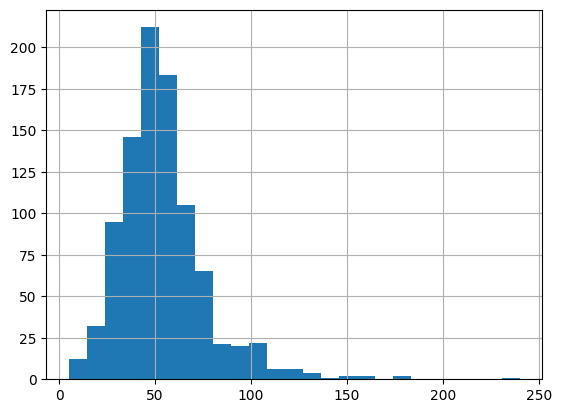

In [36]:
data['speed1_value'].hist(bins=25)

In [37]:
# Explore the feature relationships. Are there any positively or negatively correlated relationships?
data.corr()

C:\Users\getan\AppData\Local\Temp\ipykernel_5448\925088773.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Inversions,Year_Introduced,latitude,longitude,speed1_value,Speed_mph,height_value,Height_ft,Gforce
Inversions,1.000000,0.211003,-0.009815,0.061589,0.163419,0.252209,0.094811,0.171330,0.356865
Year_Introduced,0.211003,1.000000,-0.070982,0.175913,0.210191,0.204853,0.087687,0.232150,-0.066657
latitude,-0.009815,-0.070982,1.000000,-0.298488,-0.121847,-0.063757,-0.004265,0.011492,0.042871
longitude,0.061589,0.175913,-0.298488,1.000000,0.301179,0.051063,-0.092764,0.159733,0.016485
speed1_value,0.163419,0.210191,-0.121847,0.301179,1.000000,0.851667,0.088761,0.815103,0.379962
Speed_mph,0.252209,0.204853,-0.063757,0.051063,0.851667,1.000000,0.241461,0.829404,0.489337
height_value,0.094811,0.087687,-0.004265,-0.092764,0.088761,0.241461,1.000000,1.000000,0.337386
Height_ft,0.171330,0.232150,0.011492,0.159733,0.815103,0.829404,1.000000,1.000000,0.475020
Gforce,0.356865,-0.066657,0.042871,0.016485,0.379962,0.489337,0.337386,0.475020,1.000000


C:\Users\getan\AppData\Local\Temp\ipykernel_5448\3307716028.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<AxesSubplot: >

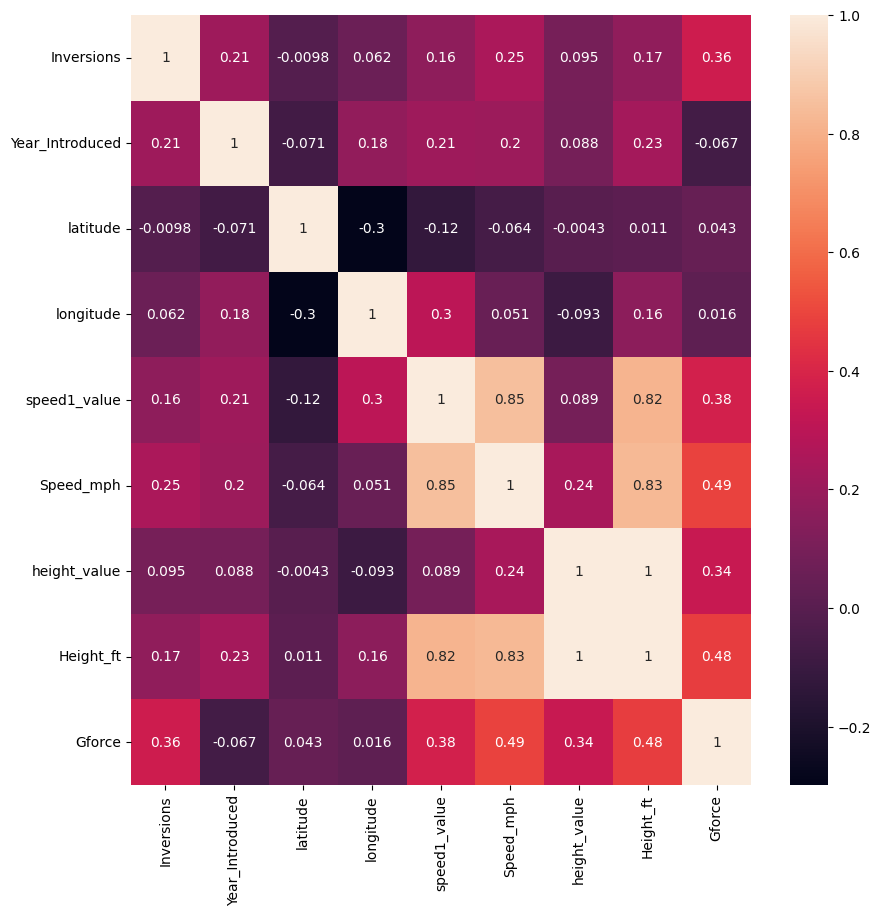

In [38]:
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)